<a href="https://colab.research.google.com/github/NehaKumari500092077/Visual-Computing/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions:
Complete the four questions given, keeping the following points in mind:

● Implement the filtering operations from scratch (Without using OpenCV)

● Show the step-by-step output of all questions in the Jupyter Notebook .ipynb file.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

#Question 1: Detecting Diagonal Edges (3 Marks).
Show how you can detect diagonal edges by designing a simple Prewitt filter for detecting 45° edges in a given image (Assignment_2_Image_1.png).

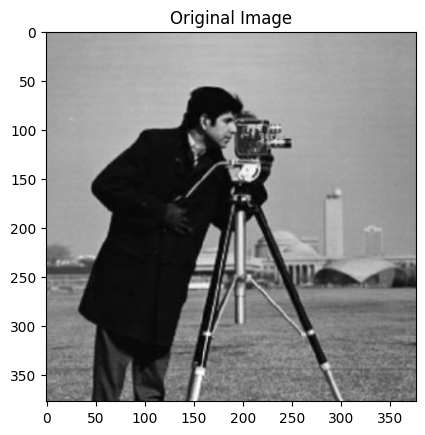

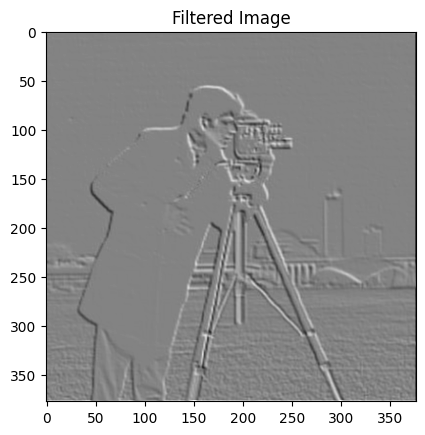

In [4]:
# Load the input image as it is given and read as a grayscale
input_image = Image.open('/content/Assignment_2_Image_1.png').convert('L')

# Convert input image into numpy array
input_image_array = np.array(input_image)

# Define the 45° Prewitt filter
prewitt_filter = np.array([
    [0, 1, 2],
    [-1, 0, 1],
    [-2, -1, 0]
  ])

def performConvolution(image, filter):
  # Get the image and filter dimensions
  image_height, image_width = image.shape
  filter_height, filter_width = filter.shape

  # Get padding height and width
  padding_height = filter_height // 2
  padding_width = filter_width // 2

  # Create a new image with padding
  padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')

  # Initialize the filtered (output) image
  filtered_image = np.zeros((image_height, image_width))

  # convolution operation (Iterate through the image and apply the filter)
  for i in range(image_height):
    for j in range(image_width):
      # Get the region of interest from the padded images
      roi = padded_image[i:i+filter_height, j:j+filter_width]

      # Apply the filter to the region of interest
      filtered_image[i, j] = np.sum(roi * filter)


  return filtered_image


# Detect diagonal edges of image using the 45° Prewitt filter
filtered_image = performConvolution(input_image_array, prewitt_filter)

# Show Original image
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.show()

# Show the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.show()


#Question 2: Edge Detection (5 Marks)
Detect the intensity transitions (edges) of an image (Assignment_2_Image_2.png) below by using a 5 x 5 Laplacian kernel whose central coefficient is 24 and all other coefficients are -1. Implement the filtering from scratch.


Also, sharpen using the Laplacian of the Gaussian (LoG) kernel below (implementation from scratch). Do you see any difference in the results you obtained? If yes, explain the difference.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/CQJCnmb/Screenshot-2024-08-31-at-5-21-06-PM.png" alt="Screenshot-2024-08-31-at-5-21-06-PM" border="0"></a>

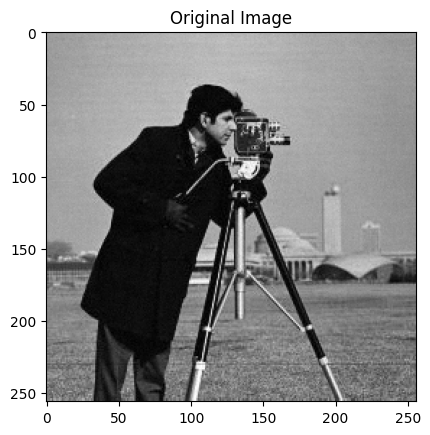

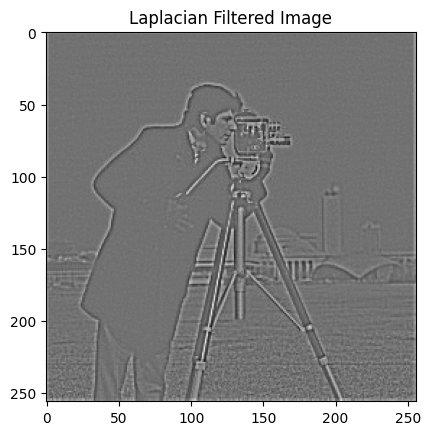

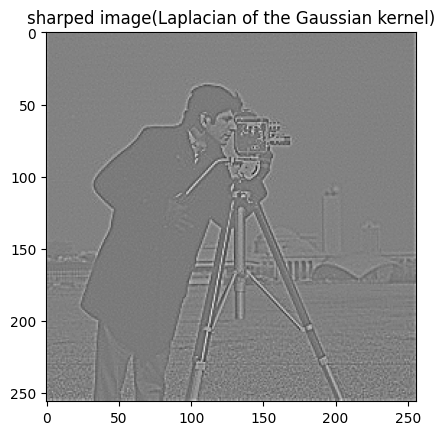

In [8]:
# Load the input image as it is given and read as a grayscale
input_image = Image.open('/content/Assignment_2_Image_2.png').convert('L')

# Convert input image into numpy array
input_image_array = np.array(input_image)

# Define Laplacian kernel whose central coefficient is 24 and all other coefficients are -1
laplacian_kernel = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 24, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
  ])

# Create Laplacian of the Gaussian (LoG) kernel as given in the question
LOG_kernel = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]
  ])


def performConvolution(image, filter):
  # Get the image and filter dimensions
  image_height, image_width = image.shape
  filter_height, filter_width = filter.shape

  # Get padding height and width
  padding_height = filter_height // 2
  padding_width = filter_width // 2

  # Create a new image with padding
  padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')

  # Initialize the filtered (output) image
  filtered_image = np.zeros((image_height, image_width))

  # convolution operation (Iterate through the image and apply the filter)
  for i in range(image_height):
    for j in range(image_width):
      # Get the region of interest from the padded images
      roi = padded_image[i:i+filter_height, j:j+filter_width]

      # Apply the filter to the region of interest
      filtered_image[i, j] = np.sum(roi * filter)


  return filtered_image


# Apply the Laplacian kernel to the image
laplacian_filtered_image = performConvolution(input_image_array, laplacian_kernel)

# Apply the LoG kernel to the image
LOG_filtered_image = performConvolution(input_image_array, LOG_kernel)

# sharpen the using the Laplacian of the Gaussian (LoG) kernel
LOG_filtered_sharpened_image = input_image_array + LOG_filtered_image

# Show Original input image
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.show()

# Show the Laplacian filtered image
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.show()

# Show the sharped image after applying Laplacian of the Gaussian kernel
plt.imshow(LOG_filtered_sharpened_image, cmap='gray')
plt.title('sharpened image(Laplacian of the Gaussian kernel)')
plt.show()



The Laplacian kernel and the sharpened image using the Laplacian of the Gaussian (LoG) kernel yield slight different results. Generally, the LoG kernel produces a smoother and less noisy edge map than the Laplacian kernel, which may pick up more noise as edges. Sharpened images using LoG will have enhanced edges with reduced noise.

#Question 3: Sharpening Using Smoothing (5 Marks)
Show how you can use Gaussian smoothing to sharpen an image using a Gaussian filter. Given: Gaussian kernel size 3x3 and standard deviation=1, The equation for Gaussian kernel is provided below:

<a href="https://ibb.co/qNWjF0t"><img src="https://i.ibb.co/wSwgrJ9/Screenshot-2024-08-31-at-5-12-45-PM.png" alt="Screenshot-2024-08-31-at-5-12-45-PM" border="0"></a>

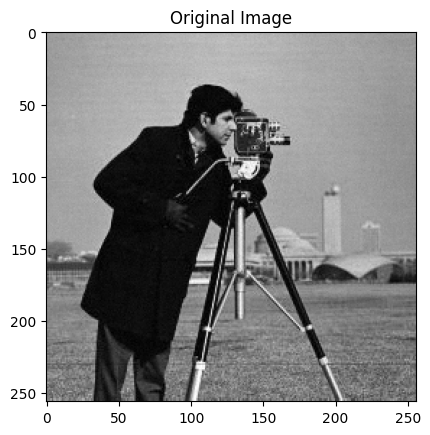

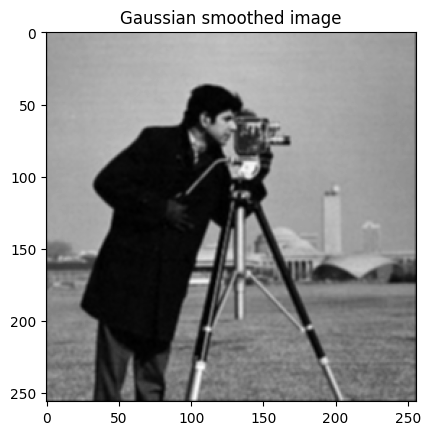

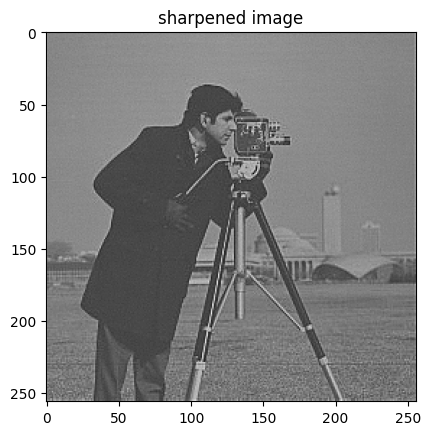

In [9]:
# Load the input image as it is given and read as a grayscale
input_image = Image.open('/content/Assignment_2_Image_2.png').convert('L')

# Convert input image into numpy array
input_image_array = np.array(input_image)




# Define Gaussian kernel size 3x3 and standard deviation=1
def get_gaussian_kernel(kernel_size, sigma=1):

  # create kernel matrix with zero
  kernel_matrix = np.zeros((kernel_size, kernel_size))

  # Get center index
  center_index = kernel_size // 2

  # constant factor in the equation of Gaussian kernel
  const = 1 / (2 * np.pi * sigma**2)

  # Fill the kernel matrix based on equation of Gaussian kernel
  for i in range(kernel_size):
    for j in range(kernel_size):
      x = i - center_index
      y = j - center_index
      exponent = -(x**2 + y**2) / (2 * sigma**2)
      kernel_matrix[i, j] = const * np.exp(exponent)

  return kernel_matrix / np.sum(kernel_matrix)




def performConvolution(image, filter):
  # Get the image and filter dimensions
  image_height, image_width = image.shape
  filter_height, filter_width = filter.shape

  # Get padding height and width
  padding_height = filter_height // 2
  padding_width = filter_width // 2

  # Create a new image with padding
  padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')

  # Initialize the filtered (output) image
  filtered_image = np.zeros((image_height, image_width))

  # convolution operation (Iterate through the image and apply the filter)
  for i in range(image_height):
    for j in range(image_width):
      # Get the region of interest from the padded images
      roi = padded_image[i:i+filter_height, j:j+filter_width]

      # Apply the filter to the region of interest
      filtered_image[i, j] = np.sum(roi * filter)


  return filtered_image




# Get 3x3 gaussian kernel with sigma(standard deviation) = 1
gaussian_kernel = get_gaussian_kernel(kernel_size = 3, sigma=1)

# Perform gaussian smoothing to the image
gaussian_smoothed_image = performConvolution(input_image_array, gaussian_kernel)

# Intialize Scaling factor
scaling_factor = 1.5

# Sharpened the image
sharpened_image = input_image_array + scaling_factor * (input_image_array - gaussian_smoothed_image)


# Show Original input image
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.show()

# Show the Gaussian smoothed image
plt.imshow(gaussian_smoothed_image, cmap='gray')
plt.title('Gaussian smoothed image')
plt.show()

# Show the Gaussian sharpened image
plt.imshow(sharpened_image, cmap='gray')
plt.title('sharpened image')
plt.show()

#Question 4: Gabor Filtering (7 Marks)
Implement Gabor filters at different scales, orientations, and frequencies (from scratch) and use them to detect edges on image (Assignment_2_Image_1.png). For this problem, you can simply use the real part of the complex Gabor filters. Use the following specifications to construct the Gabor filter kernels:

● Kernel size: 31 ✕ 31

● Standard deviation (𝜎): 1.0 and 3.0

● Aspect ratio (𝛾): 0.5

● Orientation (𝜃): 0°, 45°, 90°, 135° (for each value of 𝜃, use 𝑢 = 𝑓<sub>0</sub>cos 𝜃 and 𝑣 = 𝑓<sub>0</sub>sin 𝜃, with 𝑓<sub>0</sub> = 0.1).

● Phase offset (ɸ) = 0

For each of the two values of 𝜎, show the Gabor filter kernels (as images) as well as the filtered outputs by taking the maximum of Gabor filtered outputs at each pixel over all four orientations. Compare your implementation against OpenCV’s implementation of Gabor kernels with the same parameters.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120590 (\N{MATHEMATICAL ITALIC SMALL SIGMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


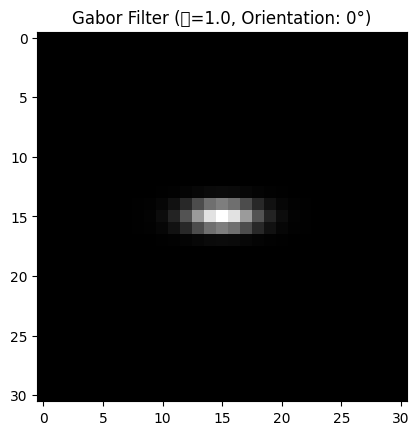

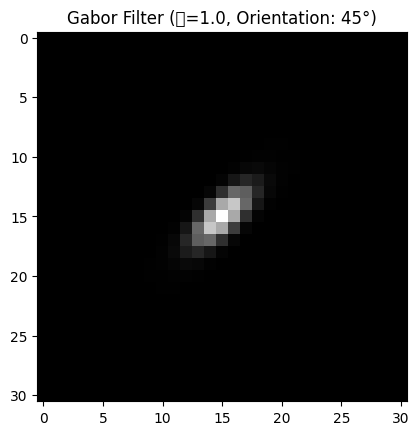

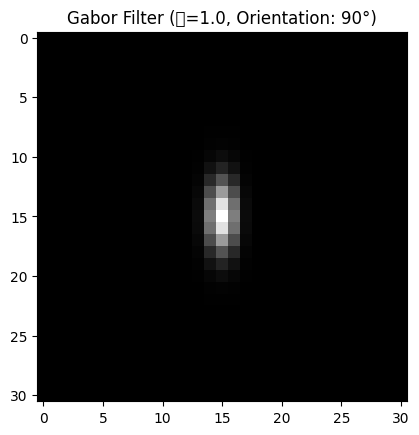

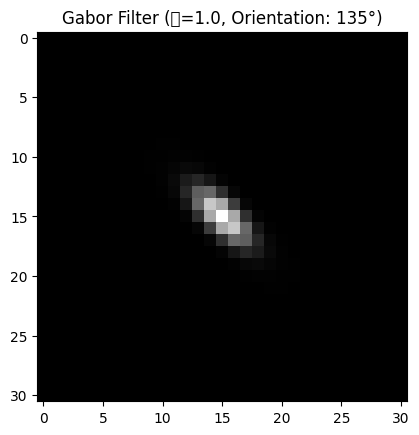

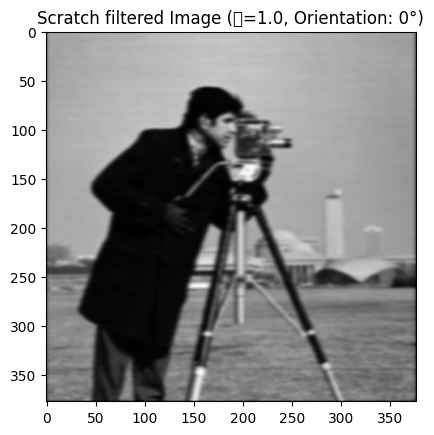

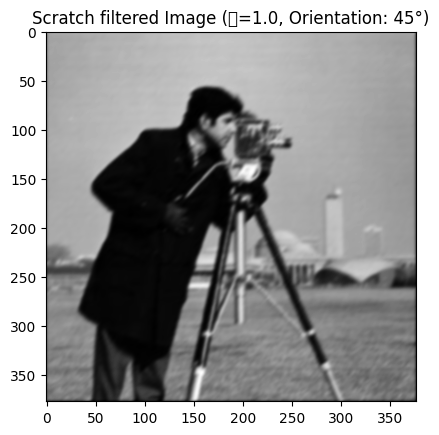

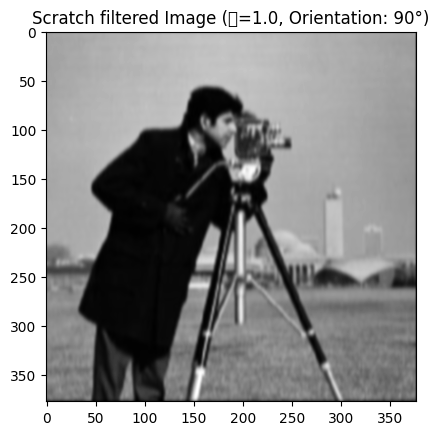

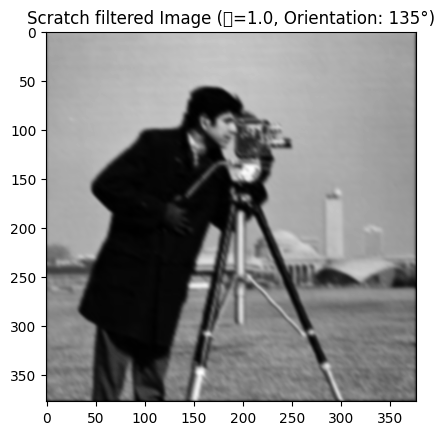

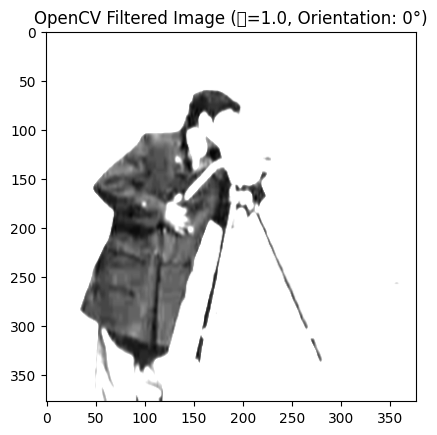

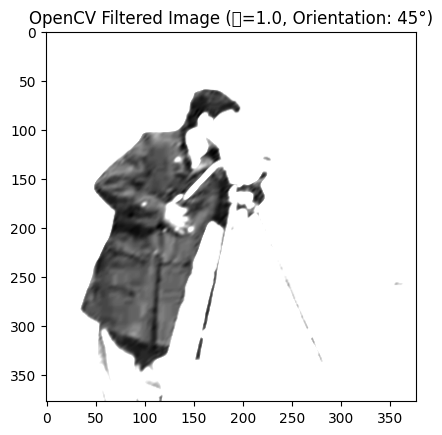

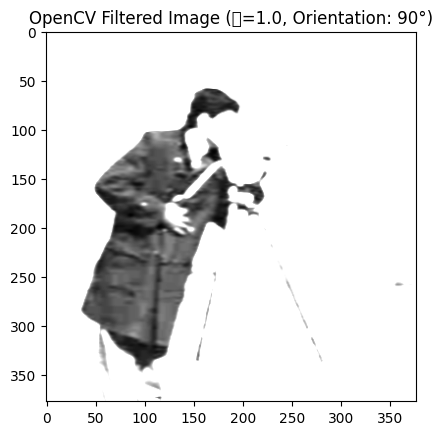

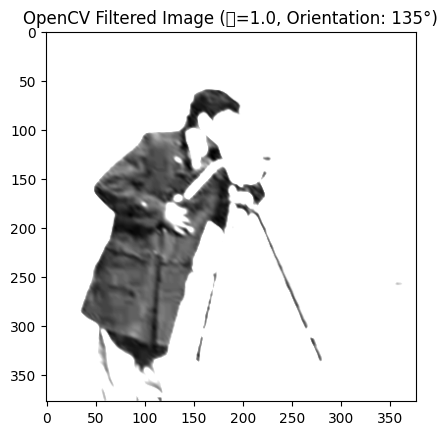

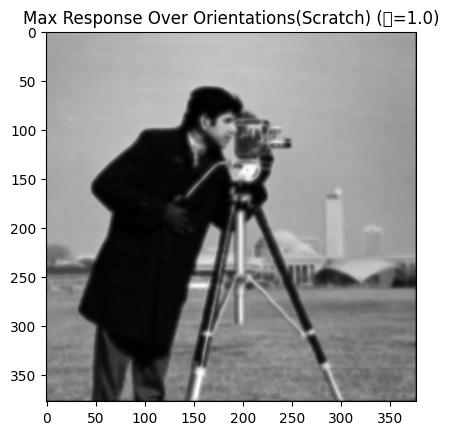

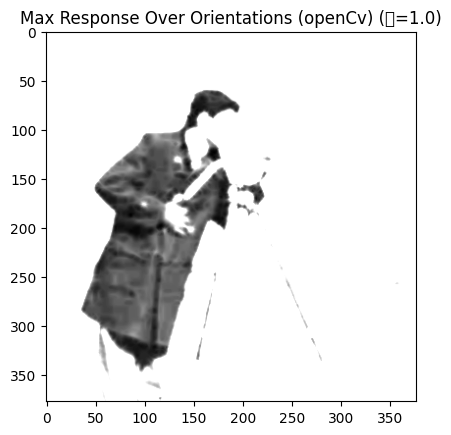

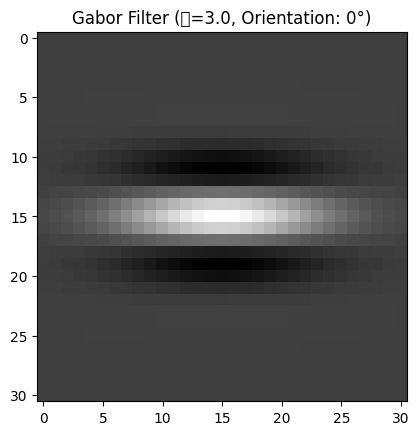

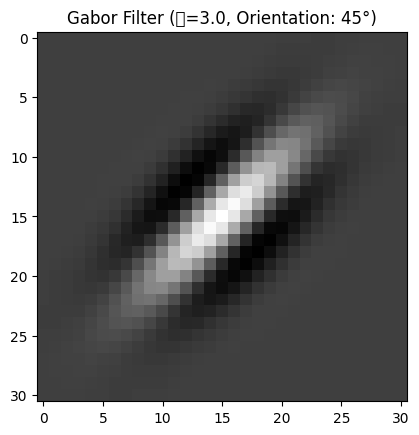

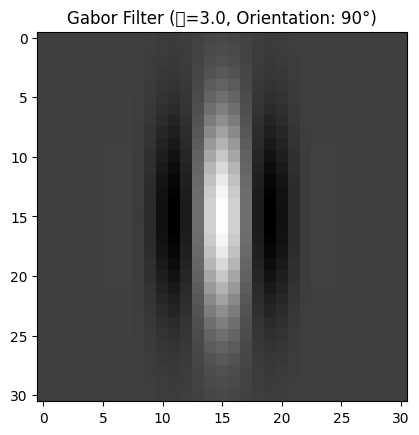

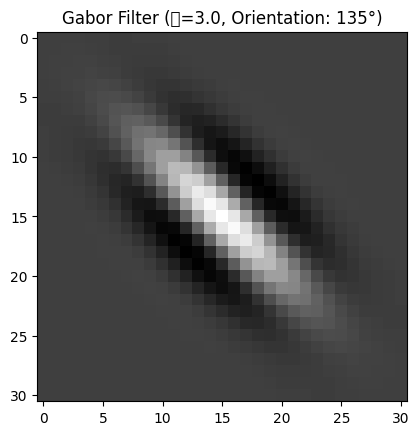

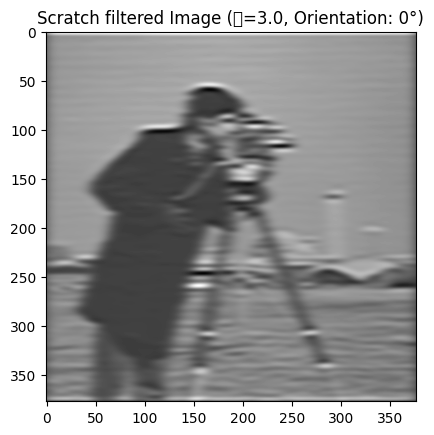

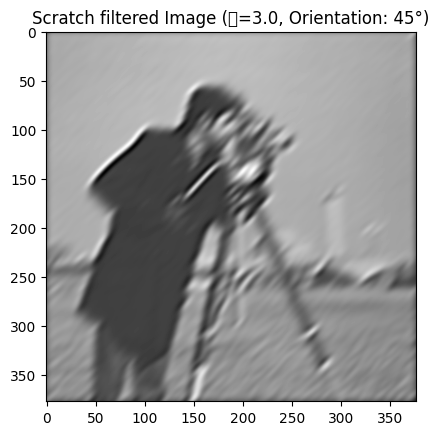

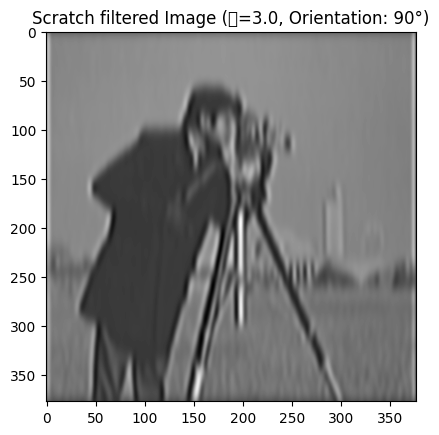

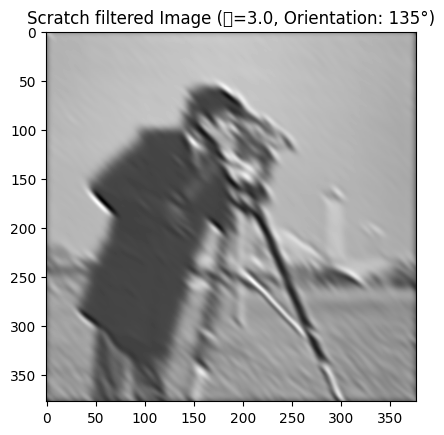

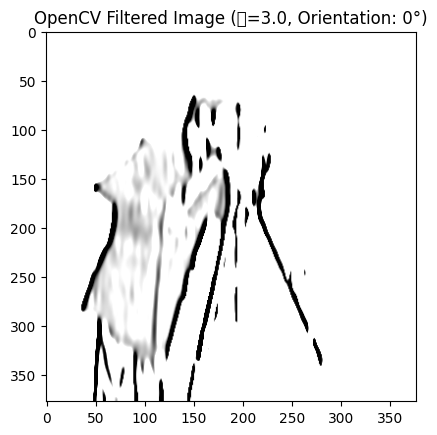

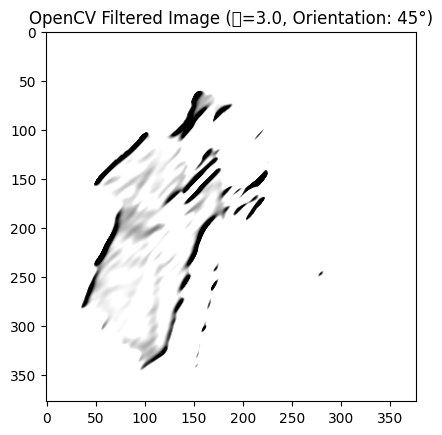

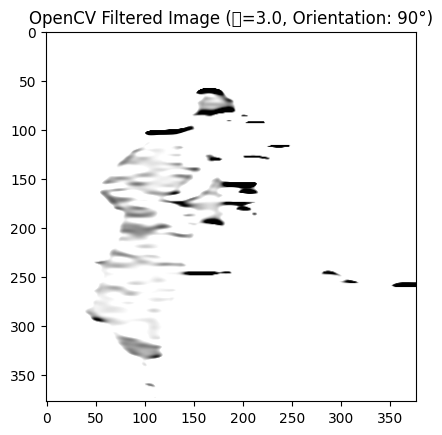

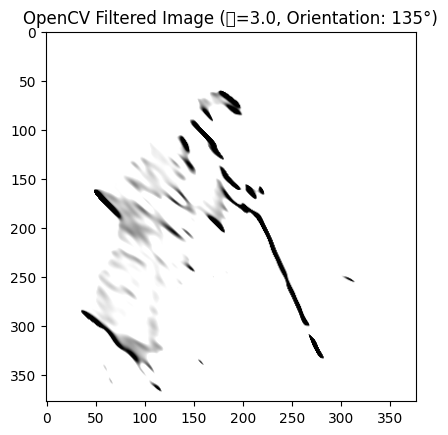

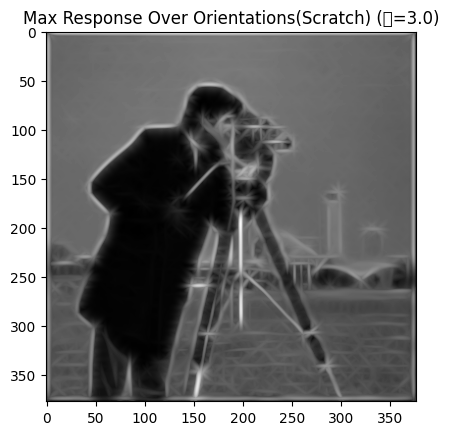

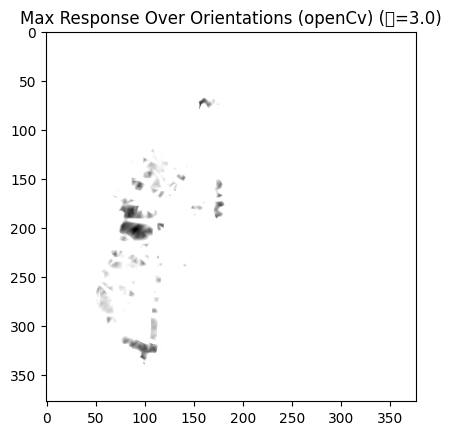

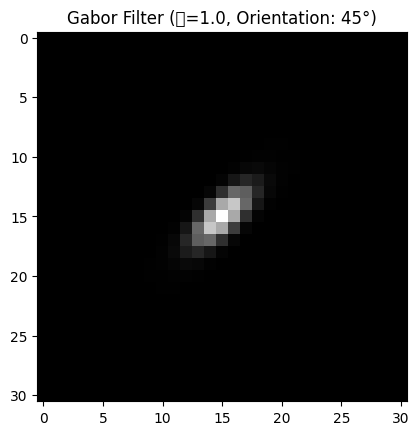

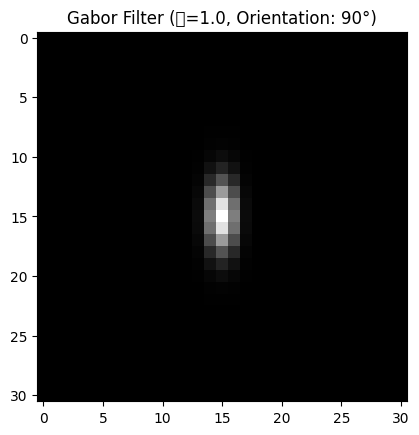

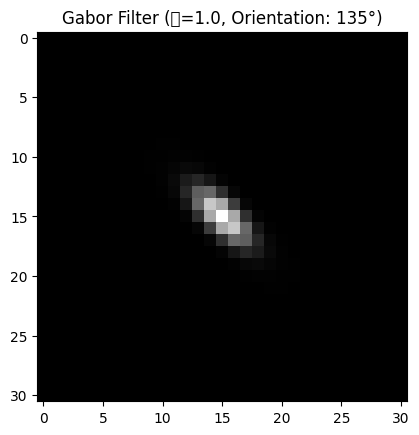

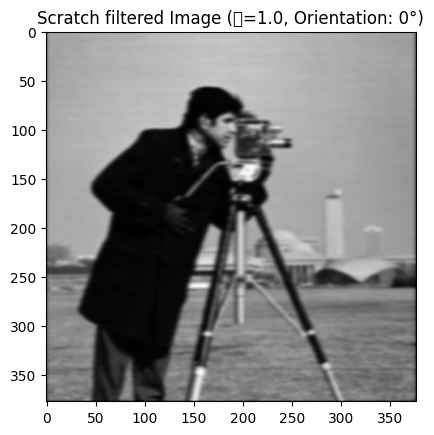

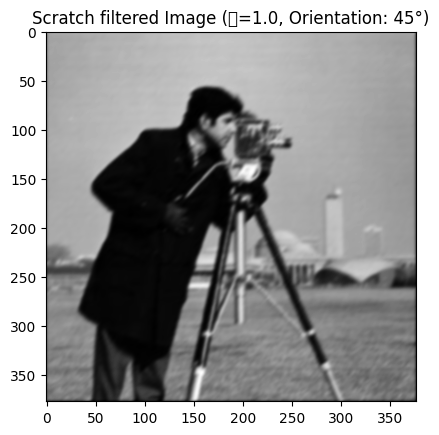

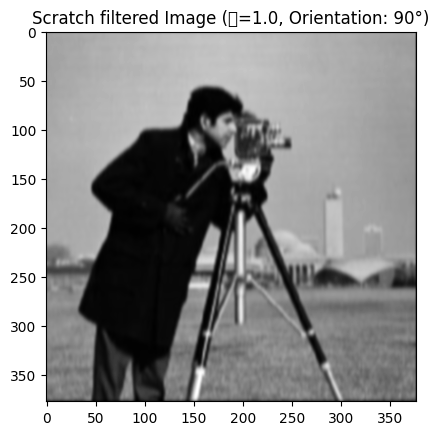

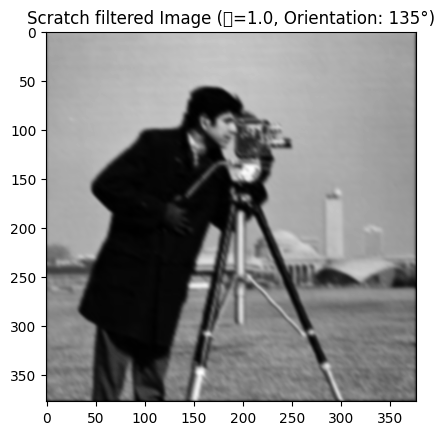

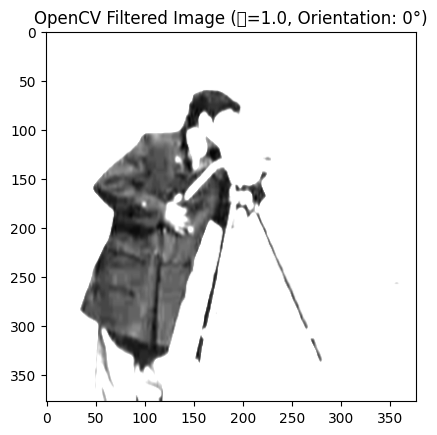

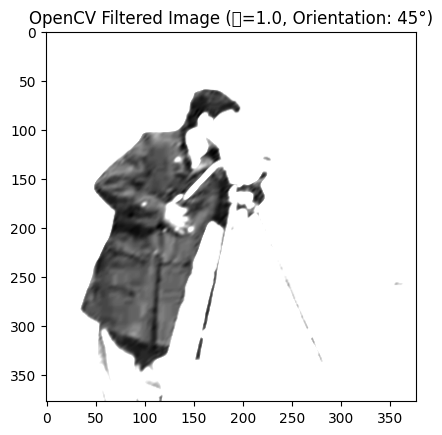

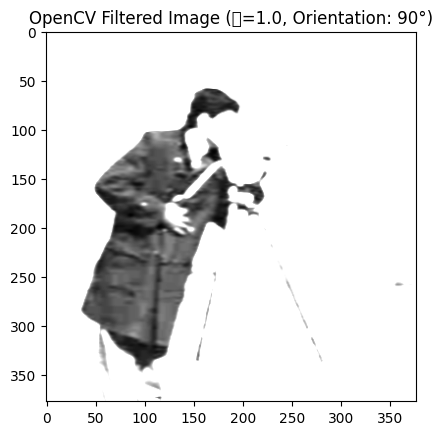

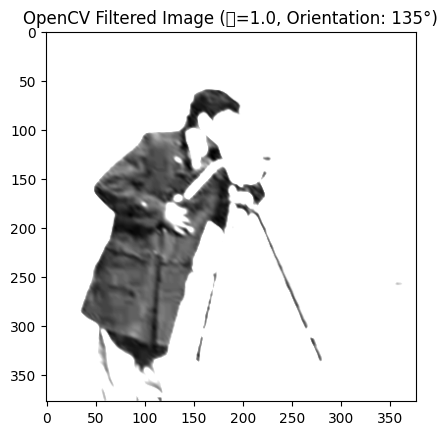

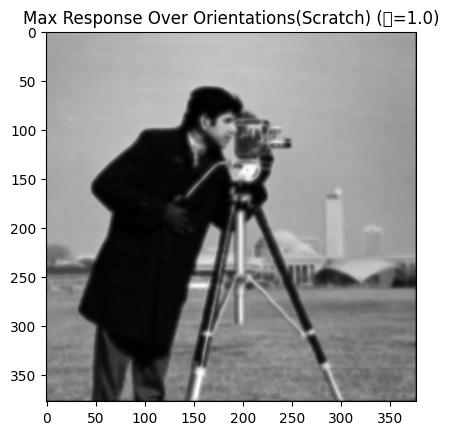

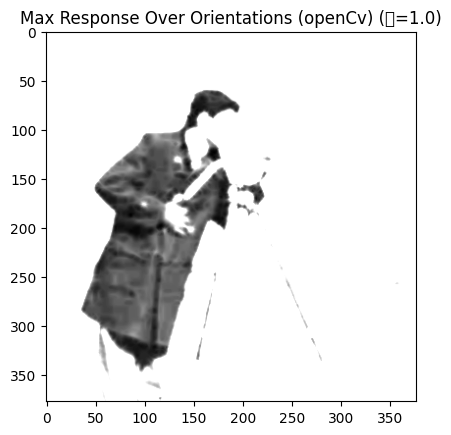

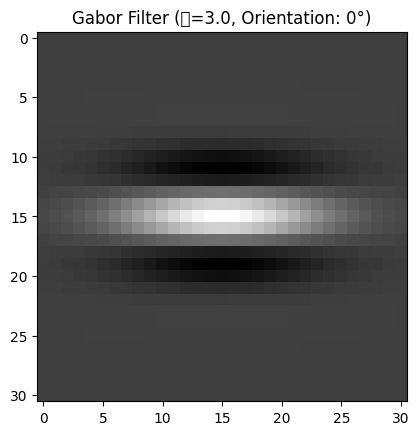

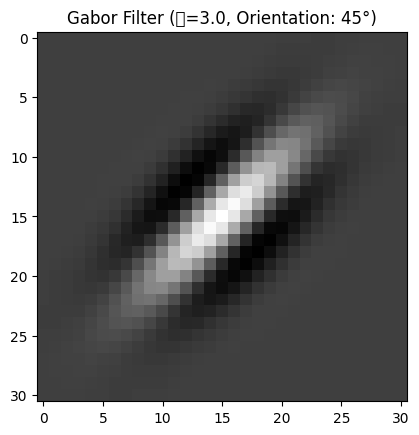

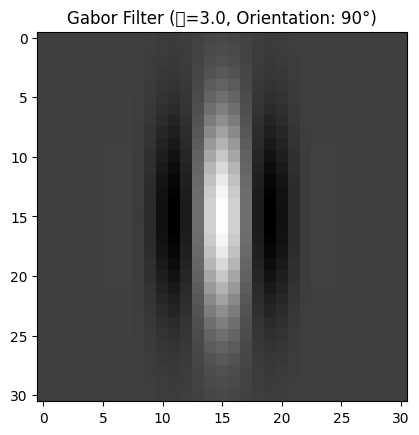

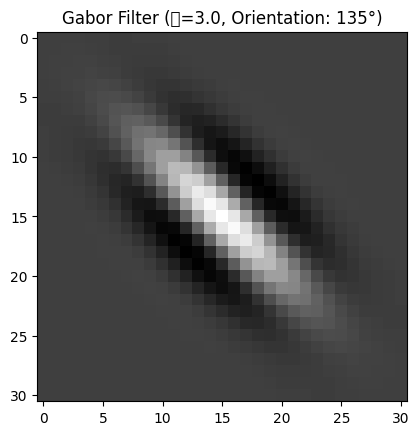

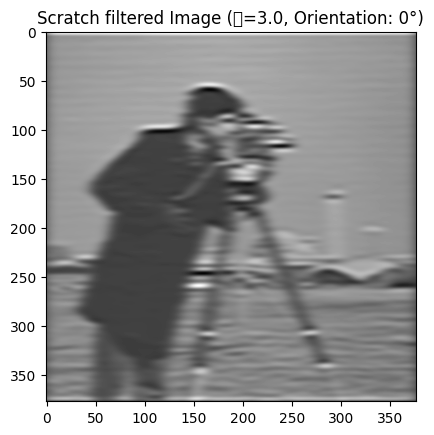

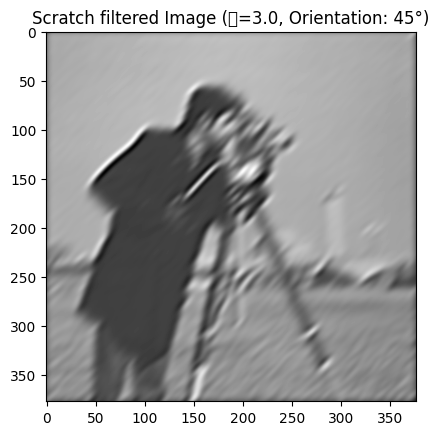

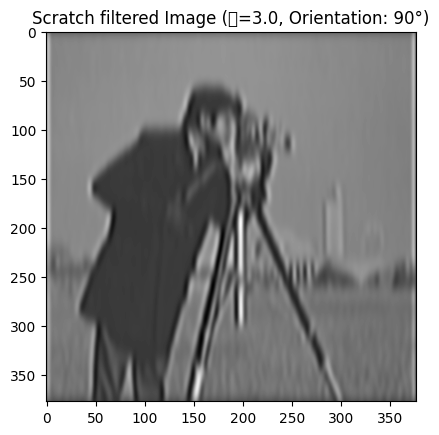

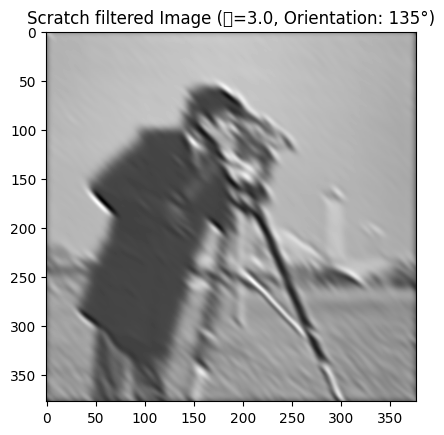

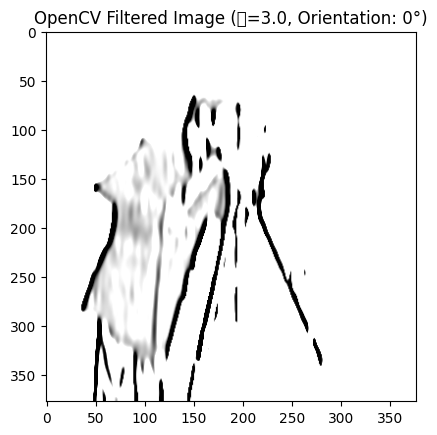

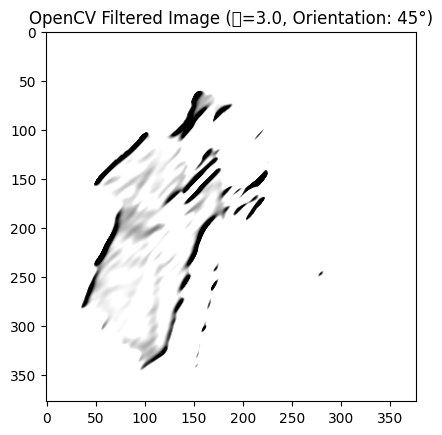

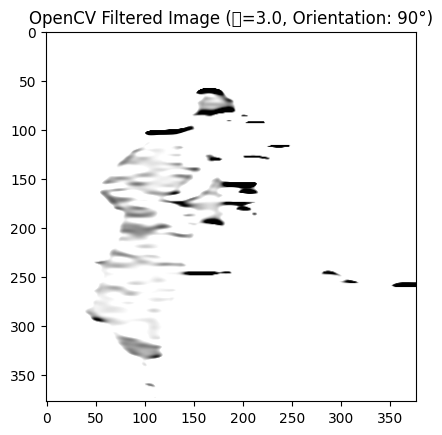

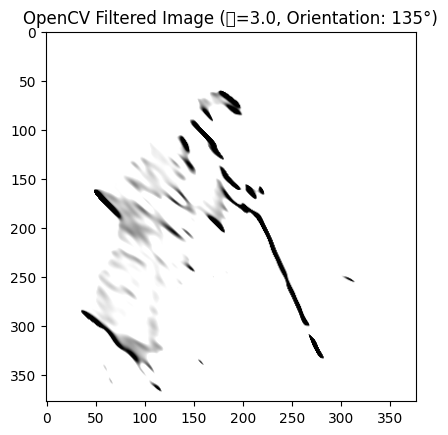

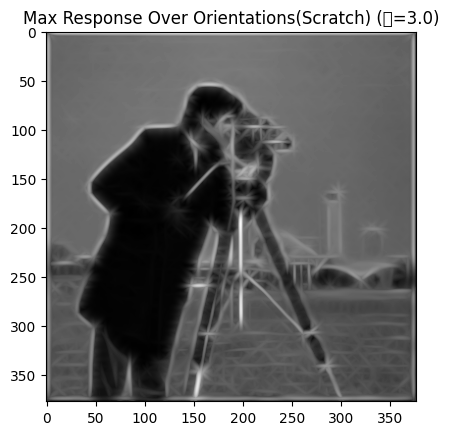

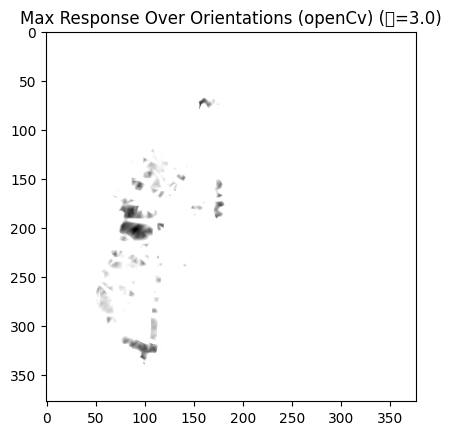

In [14]:
def get_gabor_filter(size, sigma, gamma, theta, Lambda, psi):
  x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
  x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
  x_prime = x * np.cos(theta) + y * np.sin(theta)
  y_prime = -x * np.sin(theta) + y * np.cos(theta)

  gabor = np.exp(-(x_prime**2 + gamma**2 * y_prime**2) / (2 * sigma**2)) * np.cos(2 * np.pi * x_prime / Lambda + psi)

  return gabor


def performConvolution(image, filter):
  # Get the image and filter dimensions
  image_height, image_width = image.shape
  filter_height, filter_width = filter.shape

  # Get padding height and width
  padding_height = filter_height // 2
  padding_width = filter_width // 2

  # Create a new image with padding
  padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')

  # Initialize the filtered (output) image
  filtered_image = np.zeros((image_height, image_width))

  # convolution operation (Iterate through the image and apply the filter)
  for i in range(image_height):
    for j in range(image_width):
      # Get the region of interest from the padded images
      roi = padded_image[i:i+filter_height, j:j+filter_width]

      # Apply the filter to the region of interest
      filtered_image[i, j] = np.sum(roi * filter)


  return filtered_image




# Load the input image as it is given and read as a grayscale
input_image = Image.open('/content/Assignment_2_Image_1.png').convert('L')

# Convert input image into numpy array
input_image_array = np.array(input_image)

# specifications to construct the Gabor filter kernels
kernel_size = 31
standard_deviation = [1.0, 3.0]
aspect_ratio = 0.5
f0 = 0.1
phase_offset = 0
orientation_angle = [0, 45, 90, 135]
orientation_radian = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Initialize dictionary to stor Gabor filter for each standard deviation (sigma)
gabor_filters_dict = {}

# Initialize dictionary to store filtered images for each standard deviation (sigma)
scratch_filtered_images = {}
opencv_filtered_images = {}

# Initialize dictionary to store maximum responses for each standard deviation (sigma)
scratch_max_responses = {}
opencv_max_responses = {}

for std in standard_deviation:
  gabor_filters_dict[std] = []
  for redian in orientation_radian:
    u = f0 * np.cos(redian)
    v = f0 * np.sin(redian)
    # Calculate lamda
    lamda = 1 / np.sqrt(u**2 + v**2)

    gabor_filter = get_gabor_filter(kernel_size, std, aspect_ratio, redian, lamda, phase_offset)
    gabor_filters_dict[std].append(gabor_filter)



for std in standard_deviation:
    scratch_filtered_images[std] = []
    for gabor_filter in gabor_filters_dict[std]:
        filtered_image = performConvolution(input_image_array, gabor_filter)
        scratch_filtered_images[std].append(filtered_image)

for std in standard_deviation:
    max_response = np.zeros(input_image_array.shape)
    for filtered_image in scratch_filtered_images[std]:
        max_response = np.maximum(max_response, filtered_image)
    scratch_max_responses[std] = max_response



# openCv implementation
for std in standard_deviation:
    opencv_filtered_images[std] = []
    opencv_max_response = np.zeros(input_image_array.shape)
    for redian in orientation_radian:
        # Calculate u and v
        u = f0 * np.cos(redian)
        v = f0 * np.sin(redian)

        # Calculate Lambda
        Lambda = 1 / np.sqrt(u**2 + v**2)

        # Generate Gabor kernel using OpenCV
        kernel = cv.getGaborKernel((kernel_size, kernel_size), std, redian, Lambda, aspect_ratio, phase_offset, ktype=cv.CV_32F)

        # Apply the Gabor filter
        filtered_image = cv.filter2D(input_image_array, cv.CV_8UC3, kernel)
        opencv_filtered_images[std].append(filtered_image)

        opencv_max_response = np.maximum(opencv_max_response, filtered_image)
    opencv_max_responses[std] = opencv_max_response



# Display the Gabor filters, filtered images, and maximum responses of scratch and openCv implementation
for std in standard_deviation:
  # show the gabor filters
  for i, gabor_filter in enumerate(gabor_filters_dict[std]):
    plt.imshow(gabor_filter, cmap='gray')
    plt.title(f'Gabor Filter (𝜎={std}, Orientation: {int(np.degrees(orientation_radian[i]))}°)')
    plt.show()

  # show the filtered images of scratch implementation
  for i, filtered_image in enumerate(scratch_filtered_images[std]):
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Scratch filtered Image (𝜎={std}, Orientation: {int(np.degrees(orientation_radian[i]))}°)')
    plt.show()

   # show the filtered images of openCV implementation
  for i, filtered_image in enumerate(opencv_filtered_images[std]):
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'OpenCV Filtered Image (𝜎={std}, Orientation: {int(np.degrees(orientation_radian[i]))}°)')
    plt.show()

  # show the maximum response (Scratch)
  plt.imshow(scratch_max_responses[std], cmap='gray')
  plt.title(f'Max Response Over Orientations(Scratch) (𝜎={std})')
  plt.show()

  # show the maximum response (openCv)
  plt.imshow(opencv_max_responses[std], cmap='gray')
  plt.title(f'Max Response Over Orientations (openCv) (𝜎={std})')
  plt.show()


